<a href="https://colab.research.google.com/github/Mbigdeli2003/DNN_training/blob/main/NN_TA_session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

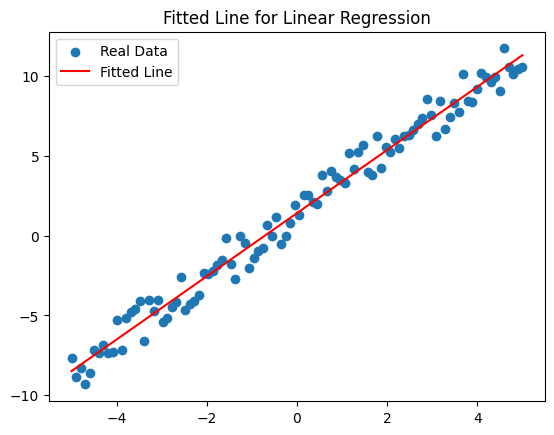

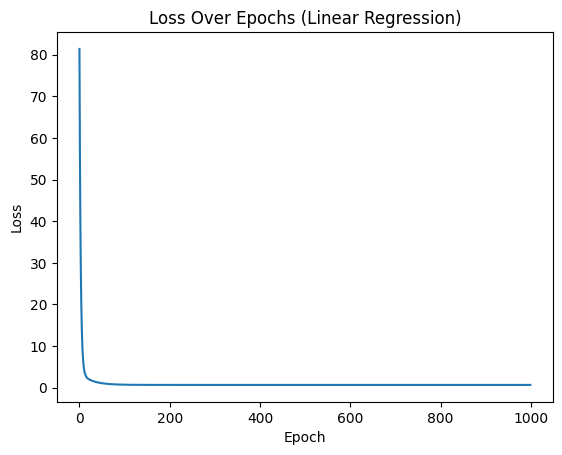

In [14]:
import torch
import matplotlib.pyplot as plt

# تولید داده‌های ساختگی با استفاده از PyTorch
X = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)  # ورودی
y = 2*X + 3 * torch.rand(X.size())  # خروجی با نویز

# پارامترهای مدل رگرسیون خطی
w = torch.randn(1, requires_grad=True)  # وزن اولیه
b = torch.randn(1, requires_grad=True)  # بایاس اولیه
learning_rate = 0.01
num_epochs = 1000

# تابع خطا از نوع MSE
criterion = torch.nn.MSELoss()

# ذخیره مقادیر loss
losses = torch.zeros(num_epochs)

# حلقه آموزش رگرسیون خطی
for epoch in range(num_epochs):
    # پیش‌بینی با مدل خطی
    y_pred = X * w + b

    # محاسبه خطا (MSE)
    loss = criterion(y_pred, y)

    # محاسبه گرادیان‌ها
    loss.backward()

    # بروزرسانی پارامترها
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # صفر کردن گرادیان‌ها
    w.grad.zero_()
    b.grad.zero_()

    # ذخیره مقدار loss
    losses[epoch] = loss

# نمایش خط رگرسیون با استفاده از PyTorch
with torch.no_grad():
    predicted = X * w + b
    plt.scatter(X.numpy(), y.numpy(), label='Real Data')
    plt.plot(X.numpy(), predicted.numpy(), 'r', label='Fitted Line')
    plt.legend()
    plt.title('Fitted Line for Linear Regression')
    plt.show()

# رسم نمودار loss با PyTorch
plt.plot(losses.detach().numpy())  # استفاده از detach() برای جدا کردن از محاسبات گرادیان
plt.title('Loss Over Epochs (Linear Regression)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


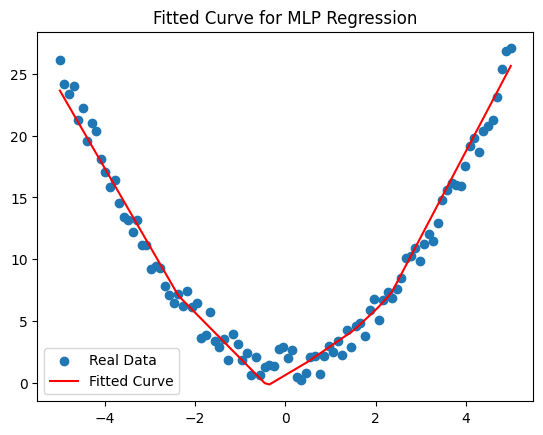

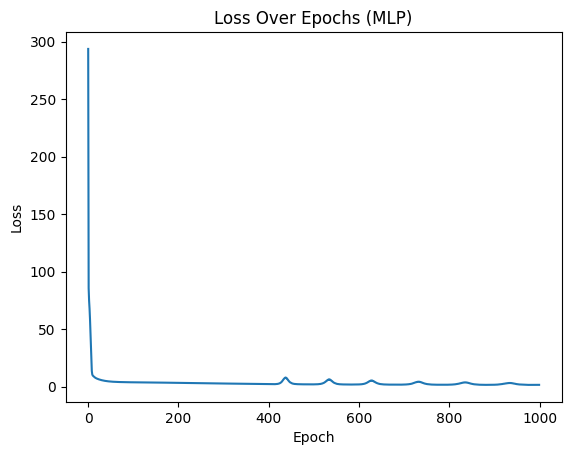

In [15]:
# تولید داده‌های غیرخطی برای MLP با PyTorch
X = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)  # ورودی
y = X.pow(2) + 3 * torch.rand(X.size())  # خروجی با نویز

# پارامترهای مدل MLP
w1 = torch.randn(1, 10, requires_grad=True)  # وزن‌های لایه ورودی به مخفی
b1 = torch.randn(10, requires_grad=True)     # بایاس‌های لایه مخفی
w2 = torch.randn(10, 1, requires_grad=True)  # وزن‌های لایه مخفی به خروجی
b2 = torch.randn(1, requires_grad=True)      # بایاس لایه خروجی

# نرخ یادگیری و تعداد تکرار
learning_rate = 0.01
num_epochs = 1000

# تابع خطا از نوع MSE برای رگرسیون
criterion = torch.nn.MSELoss()

# ذخیره مقادیر loss
losses_mlp = torch.zeros(num_epochs)

# حلقه آموزش MLP
for epoch in range(num_epochs):
    # لایه مخفی با تابع فعال‌سازی ReLU با استفاده از PyTorch
    hidden = torch.relu(X.mm(w1) + b1)

    # لایه خروجی
    y_pred = hidden.mm(w2) + b2

    # محاسبه خطا (MSE)
    loss = criterion(y_pred, y)

    # محاسبه گرادیان‌ها
    loss.backward()

    # بروزرسانی پارامترها
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad

    # صفر کردن گرادیان‌ها
    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()

    # ذخیره مقدار loss
    losses_mlp[epoch] = loss

# نمایش پیش‌بینی‌های MLP با استفاده از PyTorch
with torch.no_grad():
    predicted = hidden.mm(w2) + b2
    plt.scatter(X.numpy(), y.numpy(), label='Real Data')
    plt.plot(X.numpy(), predicted.numpy(), 'r', label='Fitted Curve')
    plt.legend()
    plt.title('Fitted Curve for MLP Regression')
    plt.show()

# رسم نمودار loss با استفاده از PyTorch
plt.plot(losses_mlp.detach().numpy())  # استفاده از detach() برای جدا کردن از محاسبات گرادیان
plt.title('Loss Over Epochs (MLP)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


#MNIST

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from keras.datasets import mnist
(images, labels), (test_X, test_y) = mnist.load_data()

plotting

In [ ]:

for i in range(10):
 plt.imshow(images[i])
 plt.show()

Gray plotting

for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(images[i], cmap=plt.get_cmap('gray'))
 plt.show()
